# 8.4 Numpy , Pandas 란?

** 1). Numpy **
- numpy는 array이 자료구조를 제공함.

파이썬의 list와 유사한 성격을 가짐.
  다만, list는 성분의 type이 달라도 구성할 수 있지만 numpy의 array는 성분의 type이 반드시 같아야 함.


In [14]:
import numpy as np
a = np.array([1,2,3,5])
print(a)
print(type(a))

print('----------------------------------------')
b = np.array([1.0,2,3,"aaa"]) # 숫자, 문자 조합의 array로 구성
print(b)                      # 자동으로 형변환을 시킨다.
print(type(b))

print('----------------------------------------')
c = [1,2,3,4,'so']            # 파이썬의 list는 형변환 없이 가능함.
print(c)
print(type(c))
print(type(c[0]))             # int형
print(type(c[4]))             # str형

[1 2 3 5]
<class 'numpy.ndarray'>
----------------------------------------
['1.0' '2' '3' 'aaa']
<class 'numpy.ndarray'>
----------------------------------------
[1, 2, 3, 4, 'so']
<class 'list'>
<class 'int'>
<class 'str'>


** 2). Pandas **
- Pandas는 데이터 분석을 위한 고수준의 자료구조와 데이터 분석 도구를 제공함.
- Pandas의 Series는 1차원 데이터를 다루는 데 효과적인 자료구조. ->(파이썬의 리스트와 튜플과 같은 1차원 배열)
- Pandas의 DataFrame은 행과 열로 구성된 2차원 데이터를 다루는 데 효과적인 자료 구조.

** 2.1. Series **
- Series는 파이션의 리스트와, 딕션너리를 융합해 놓은 자료구조이다.

In [6]:
# Python List 자료구조
mystock = ['kakao', 'naver']
print(mystock)
print(mystock[0])
print(mystock[1])
print("-------------")
for stock in mystock:
    print(stock)

['kakao', 'naver']
kakao
naver
-------------
kakao
naver


In [8]:
# Python dictionary
dic = {'key1':'room1', 'key2':'room2'}
print(dic)
print(dic['key1'])
print(dic['key2'])

{'key1': 'room1', 'key2': 'room2'}
room1
room2


In [10]:
# Pandas Series
from pandas import Series, DataFrame
kakao = Series([92600, 92400, 92100, 94300, 92300])
print(kakao) # Series 객체는 1차원 배열과 달리 값뿐만 아니라 각 값에 연결된 인덱스 값도 동시에 저장되고 인덱스 값은 0부터 순서대로 저장됨.
print('----------------')
print(kakao[0])
print(kakao[3])

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64
----------------
92600
94300


In [18]:
# Series 객체는 인덱싱 값을 사용자가 설정할 수 있음.
kakao2 = Series([92600, 92400, 92100, 94300, 92300], index=['2016-11-01','2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05'])
print(kakao2)
print("2016-11-03 : {0}".format( kakao2['2016-11-03'])) 
# Series 객체 내의 데이터는 1차원으로 저장되어 있지만 파이썬의 딕셔너리와 유사하게 값과 해당 값에 대한 인덱스 값이 서로 연결되어 있음.

print('------------------------')
for date in kakao2.index:
    print(date)
print('------------------------')
for end_price in kakao2.values:
    print(end_price)    

2016-11-01    92600
2016-11-02    92400
2016-11-03    92100
2016-11-04    94300
2016-11-05    92300
dtype: int64
2016-11-03 : 92100
------------------------
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
------------------------
92600
92400
92100
94300
92300


** 2.2 DataFrame **
- DataFrame은 여러 개의 컬럼으로 구성된 2차원 형태의 자료구조.

In [25]:
# 파이썬의 딕셔너리를 사용하여 DataFrame 객체를 생성.
from pandas import Series, DataFrame

raw_data = {'col0': [1, 2, 3, 4],
            'col1': [10, 20, 30, 40],
            'col2': [100, 200, 300, 400]}

data = DataFrame(raw_data)
print(data)
print('-----------------')
# Row 방향으로 Series와 같이 정숫값으로 자동으로 인덱싱이 생성됨.
print(data['col0'])
print('-----------------')
print(data['col2'])
# 파이썬 딕셔너리에서 키를 통해 값에 접근했던 것과 같이 DataFrame 객체의 각 컬럼에 접근할 수 있다.
type(data['col0']) # type()을 통해 DataFrame의 각 컬럼의 타입을 확인해 보면 Series 객체임을 알 수 있다. 
# 즉, DataFrame은 인덱스가 같은 여러 개의 Series 객체로 구성된 자료구조라고 생각하면 됨.

   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400
-----------------
0    1
1    2
2    3
3    4
Name: col0, dtype: int64
-----------------
0    100
1    200
2    300
3    400
Name: col2, dtype: int64


pandas.core.series.Series

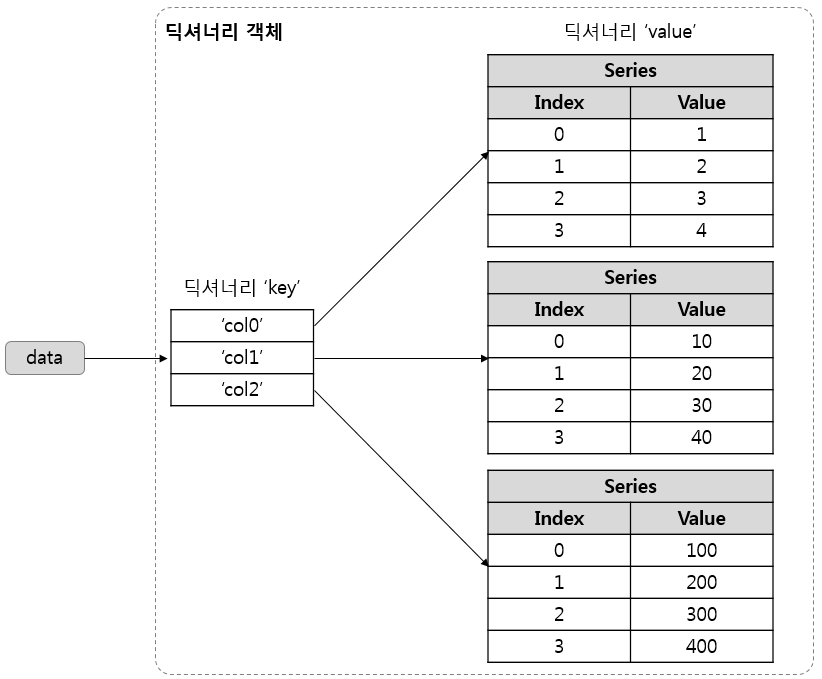

In [26]:
## 축약형 문자 표현
from IPython.display import Image
Image("./series.png")

### RDBMS와 PANDAS

In [47]:
import pymysql as db
import pandas as pd

conn = db.connect(host='localhost', user='root', password='qwaszx12',db='TestDB', charset='utf8')
data = pd.read_sql("SELECT * FROM users", conn)    
print(data)
print('---------------------------------------------------------------')
print(type(data))   # data type pandas.dataFrame
print('---------------------------------------------------------------')
print(data.shape)   # 3,3 행렬
print('---------------------------------------------------------------')
print(data.ix[0])   # dataFrame Row에 접근해서 data 호출
print('---------------------------------------------------------------')
print(data.columns) # dataFrame 의 행렬정보 
print('---------------------------------------------------------------')
print(data['email']) # 컬럼명을 이용해서 data 추출
print('---------------------------------------------------------------')
print(data.index)

   id            email password
0   3  test3@naver.com  m123456
1   4  test4@naver.com  m123456
2   5  test5@naver.com  m123456
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
---------------------------------------------------------------
(3, 3)
---------------------------------------------------------------
id                        3
email       test3@naver.com
password            m123456
Name: 0, dtype: object
---------------------------------------------------------------
Index(['id', 'email', 'password'], dtype='object')
---------------------------------------------------------------
0    test3@naver.com
1    test4@naver.com
2    test5@naver.com
Name: email, dtype: object
---------------------------------------------------------------
RangeIndex(start=0, stop=3, step=1)
